## Imports

In [13]:
import warnings

# def fxn():
#     warnings.warn("deprecated", DeprecationWarning)

# with warnings.catch_warnings():
#     warnings.simplefilter("ignore")
#     fxn()
    
warnings.filterwarnings('ignore')

#warning website: https://queirozf.com/entries/suppressing-ignoring-warnings-in-python-reference-and-examples

In [65]:
import pandas as pd
import numpy as np
import re
import string
from pprint import pprint

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import jaccard_score

import pyLDAvis
import pyLDAvis.gensim as gensimvis
import pyLDAvis.sklearn
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel
from gensim.models.nmf import Nmf

import bitermplus as btm

import spacy
import operator
from operator import itemgetter


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rachaellam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rachaellam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
# Way around missing packages that for some reason I can't download the normal way

import os
import nltk

# Create NLTK data directory
NLTK_DATA_DIR = './nltk_data'
if not os.path.exists(NLTK_DATA_DIR):
        os.makedirs(NLTK_DATA_DIR)

nltk.data.path.append(NLTK_DATA_DIR)

# Download packages and store in directory above
nltk.download('punkt', download_dir=NLTK_DATA_DIR)
nltk.download('averaged_perceptron_tagger', download_dir=NLTK_DATA_DIR)
nltk.download('wordnet', download_dir=NLTK_DATA_DIR)

[nltk_data] Downloading package punkt to ./nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     ./nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to ./nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Data Import

Upload csv below if you don't want to run all the deata cleaning again

In [16]:
contents = pd.read_csv('data/contents.csv')
titles = pd.read_csv('data/titles.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/contents.csv'

In [17]:
df = pd.read_csv("data/doj.csv")
df = df.drop(columns=['id','topics','components'], axis=1)

## Data Cleaning

In [18]:
df['contents'] = df['contents'].astype(str)
df['contents_processed'] = \
df['contents'].map(lambda x: re.sub('[,\.!?]','',x))
df['contents_processed'] = \
df['contents_processed'].map(lambda x: x.lower())
df['contents_processed']

df['title'] = df['title'].astype(str)
df['title_processed'] = \
df['title'].map(lambda x: re.sub('[,\.!?]','',x))
df['title_processed'] = \
df['title_processed'].map(lambda x: x.lower())
df['title_processed']

df = df.drop(columns=['title', 'contents'])
df

,date,contents_processed,title_processed
0,2018-07-27,the us district court for the northern distric...,district court enters permanent injunction aga...
1,2018-07-27,the department of justice announced today that...,justice department announces resolution with ...
2,2018-07-27,yesterday a federal judge found ahmed el-sheri...,kansas city area laboratory owner convicted of...
3,2018-07-26,the department of justice announced today that...,3m company agrees to pay $91 million to resolv...
4,2018-07-26,a federal grand jury in new orleans louisiana ...,amite residents charged with civil rights crim...
...,...,...,...
17819,2018-07-30,washington – a jordanian national residing in ...,jordanian national arrested in new york to fac...
17820,2018-07-30,a charlottesville virginia man was sentenced t...,former virginia high school science teacher se...
17821,2018-07-30,a federal jury convicted a sterling virginia w...,former owner of sleep study businesses convict...
17822,2018-07-30,remarks as prepared for delivery\r\nthank you ...,attorney general sessions delivers remarks at ...


In [19]:
contents = df.drop(['title_processed'], axis=1)
titles = df.drop(['contents_processed'], axis=1)

## Tokenization / Lemmatization / Stop Word Removal

Using collections to count number of words and see if I should add any to the stop_words list

In [990]:
lemma = contents.lemma.str.cat(sep=', ')

AttributeError: 'DataFrame' object has no attribute 'lemma'

In [499]:
from collections import Counter

# split() returns list of all the words in the string
split_it = lemma.split()
  
# Pass the split_it list to instance of Counter class.
Counter = Counter(split_it)
  
# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur = Counter.most_common(100)
  
print(most_occur)

[('the', 692857), ('of', 415991), ('and', 401143), ('to', 344021), ('in', 250838), ('be', 231342), ('a', 184474), ('for', 125033), ('"', 122470), ('that', 108158), ('’s', 107810), ('-', 101818), ('with', 76217), ('by', 72682), ('attorney', 71318), ('department', 66089), ('on', 65841), ('have', 59526), ('us', 55837), ('as', 54294), ('from', 50327), ('district', 47888), ('justice', 46574), ('division', 44804), ('at', 44555), ('this', 41697), (')', 40838), ('(', 40463), ('we', 37893), ('an', 36678), ('$', 35775), ('or', 35400), ('general', 34977), ('office', 34965), ('charge', 34919), ('criminal', 34606), (';', 33007), ('their', 32995), ('will', 32239), ('case', 31606), ('assistant', 31534), ('who', 31153), ('his', 30852), ('federal', 30628), ('fraud', 29794), ('law', 29369), ('service', 28478), ('he', 28436), ('act', 27948), ('other', 27853), ('tax', 27712), ('today', 27344), ('year', 27269), ('enforcement', 26485), ('our', 26070), ('court', 25725), ('they', 25675), ('also', 25069), ('no

Lemmatizing contents_processed on both contents and titles dataframes

In [20]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lemmatize(data):
    doc = nlp(data)
    return " ".join([token.lemma_ for token in doc])

In [21]:
contents['lemma'] = contents['contents_processed'].apply(lemmatize)
titles['lemma'] = titles['title_processed'].apply(lemmatize)

In [ ]:
contents

Creating tokens of the lemmatized words

In [23]:
stop_words = stopwords.words('english')
stop_words.extend(['department', 'sentenced', 'justice', 'man', 'attorney', 'district', 'law', 'case', 'general',
                  'assistant', 'office', 'law', 'division', 'us', 'yesterday', 'today', 'enforcement', 'united',
                  'states', 'also', 'say', 'one', 'criminal', 'court', 'defendant', 'year', 'act', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

In [24]:
data = contents.lemma.values.tolist()
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)

In [25]:
contents['tokens'] = data_words

In [92]:
data_title = titles.lemma.values.tolist()
title_words = list(sent_to_words(data_words))
title_words = remove_stopwords(title_words)

In [27]:
titles['tokens'] = title_words

In [28]:
contents

,date,contents_processed,lemma,tokens
0,2018-07-27,the us district court for the northern distric...,the us district court for the northern distric...,"[northern, illinois, enter, permanent, injunct..."
1,2018-07-27,the department of justice announced today that...,the department of justice announce today that ...,"[announce, swiss, base, mireli, hold, sa, reac..."
2,2018-07-27,yesterday a federal judge found ahmed el-sheri...,yesterday a federal judge find ahmed el - sher...,"[federal, judge, find, ahmed, el, sherif, owne..."
3,2018-07-26,the department of justice announced today that...,the department of justice announce today that ...,"[announce, company, headquarter, st, paul, min..."
4,2018-07-26,a federal grand jury in new orleans louisiana ...,a federal grand jury in new orleans louisiana ...,"[federal, grand, jury, new, orleans, louisiana..."
...,...,...,...,...
17819,2018-07-30,washington – a jordanian national residing in ...,washington – a jordanian national reside in mo...,"[washington, jordanian, national, reside, mont..."
17820,2018-07-30,a charlottesville virginia man was sentenced t...,a charlottesville virginia man be sentence tod...,"[charlottesville, virginia, sentence, month, p..."
17821,2018-07-30,a federal jury convicted a sterling virginia w...,a federal jury convict a sterling virginia wom...,"[federal, jury, convict, sterling, virginia, w..."
17822,2018-07-30,remarks as prepared for delivery\r\nthank you ...,remark as prepare for delivery \r\n thank you ...,"[remark, prepare, delivery, thank, beth, gener..."


## Count Vectorizer

Creating a vocabulary of words that have been run through the TFIDF to remove any words in more than 90% of documents and less than 5% of documents becuase using NMF with TFIDF got the best results visually (ie. words made most sense) but having a hard time generating the coherence and jaccard metrics for that model

In [29]:
#vectorizer = CountVectorizer(max_df = 0.7)
vectorizer = TfidfVectorizer(stop_words=stop_words, ngram_range = (1,1), max_df = 0.9, min_df=0.05)
vectorizer.fit_transform(contents.lemma)
vector_vocab = vectorizer.get_feature_names()

In [30]:
vector_vocab

['10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '21',
 '22',
 '23',
 '24',
 '25',
 '250000',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '40',
 '50',
 '60',
 '800',
 'ability',
 'able',
 'abuse',
 'accept',
 'access',
 'accord',
 'account',
 'accountability',
 'accountable',
 'accusation',
 'across',
 'action',
 'activity',
 'addition',
 'additional',
 'additionally',
 'address',
 'administration',
 'administrator',
 'admit',
 'advance',
 'affair',
 'agency',
 'agent',
 'aggressively',
 'agree',
 'agreement',
 'aid',
 'aka',
 'al',
 'allegation',
 'allege',
 'allegedly',
 'allow',
 'along',
 'already',
 'america',
 'american',
 'americans',
 'among',
 'amount',
 'andrew',
 'announce',
 'announcement',
 'another',
 'anti',
 'antitrust',
 'anyone',
 'appear',
 'application',
 'apply',
 'appropriate',


In [31]:
def MIN_DF(texts):
    return [word for word in texts 
            if word in vector_vocab.keys()]

def TFIDF_MIN_DF(texts):
    return [word for word in texts 
            if word in vector_vocab]

stop_words = stopwords.words('english')
stop_words.extend(['also', 'say', 'one', 'criminal', 'court', 'defendant', 'year', 'act', 'use'])

def remove_stopwords_2(texts):
    return [word for word in texts
           if word not in stop_words]

In [32]:
contents['max_df'] = contents['tokens'].apply(TFIDF_MIN_DF)
#contents['max_df'] = contents['tokens'].apply(remove_stopwords_2)

In [33]:
contents

,date,contents_processed,lemma,tokens,max_df
0,2018-07-27,the us district court for the northern distric...,the us district court for the northern distric...,"[northern, illinois, enter, permanent, injunct...","[northern, enter, injunction, three, relate, c..."
1,2018-07-27,the department of justice announced today that...,the department of justice announce today that ...,"[announce, swiss, base, mireli, hold, sa, reac...","[announce, base, hold, reach, resolution, tax,..."
2,2018-07-27,yesterday a federal judge found ahmed el-sheri...,yesterday a federal judge find ahmed el - sher...,"[federal, judge, find, ahmed, el, sherif, owne...","[federal, judge, find, owner, safety, officer,..."
3,2018-07-26,the department of justice announced today that...,the department of justice announce today that ...,"[announce, company, headquarter, st, paul, min...","[announce, company, paul, agree, pay, million,..."
4,2018-07-26,a federal grand jury in new orleans louisiana ...,a federal grand jury in new orleans louisiana ...,"[federal, grand, jury, new, orleans, louisiana...","[federal, grand, jury, new, return, six, count..."
...,...,...,...,...,...
17819,2018-07-30,washington – a jordanian national residing in ...,washington – a jordanian national reside in mo...,"[washington, jordanian, national, reside, mont...","[washington, national, arrest, international, ..."
17820,2018-07-30,a charlottesville virginia man was sentenced t...,a charlottesville virginia man be sentence tod...,"[charlottesville, virginia, sentence, month, p...","[virginia, sentence, month, prison, child, ann..."
17821,2018-07-30,a federal jury convicted a sterling virginia w...,a federal jury convict a sterling virginia wom...,"[federal, jury, convict, sterling, virginia, w...","[federal, jury, convict, virginia, woman, heal..."
17822,2018-07-30,remarks as prepared for delivery\r\nthank you ...,remark as prepare for delivery \r\n thank you ...,"[remark, prepare, delivery, thank, beth, gener...","[prepare, thank, thank, leadership, legal, pol..."


Saving content to csvs so I don't have to rerun everything above

In [34]:
contents.to_csv('data/contents.csv', index=False)
titles.to_csv('data/titles.csv', index=False)

## LDA (Gensim)

Using max_def column as dictionary and corpus to try and replicate TFIDF

In [35]:
content_words = list(contents['max_df'])

In [36]:
# Create Dictionary
id2word_content = corpora.Dictionary(content_words)
# Create Corpus
texts_content = content_words
# Term Document Frequency
corpus_content = [id2word_content.doc2bow(text) for text in texts_content]

In [37]:
num_topics = list(np.arange(2, 15, 1))
LDA_models = {}
for num in range(0, len(num_topics)):
    LDA_models[num] = gensim.models.LdaMulticore(corpus=corpus_content, id2word=id2word_content, 
                                                 num_topics=num_topics[num])

In [38]:
LDA_topics = {}
for num in range(0, len(num_topics)):
    LDA_topics[num] = LDA_models[num].print_topics()

In [39]:
pprint(LDA_topics)

{0: [(0,
      '0.009*"charge" + 0.009*"federal" + 0.008*"fraud" + 0.008*"service" + '
      '0.008*"tax" + 0.007*"investigation" + 0.006*"include" + '
      '0.006*"information" + 0.006*"provide" + 0.006*"state"'),
     (1,
      '0.010*"charge" + 0.008*"federal" + 0.008*"fraud" + 0.007*"service" + '
      '0.007*"guilty" + 0.007*"tax" + 0.006*"include" + 0.006*"investigation" '
      '+ 0.006*"sentence" + 0.006*"company"')],
 1: [(0,
      '0.009*"federal" + 0.009*"fraud" + 0.009*"charge" + 0.007*"company" + '
      '0.007*"service" + 0.007*"health" + 0.007*"tax" + 0.006*"investigation" '
      '+ 0.006*"provide" + 0.006*"conspiracy"'),
     (1,
      '0.009*"charge" + 0.009*"tax" + 0.008*"service" + 0.008*"fraud" + '
      '0.007*"include" + 0.007*"federal" + 0.007*"investigation" + '
      '0.007*"civil" + 0.006*"pay" + 0.006*"information"'),
     (2,
      '0.011*"charge" + 0.009*"federal" + 0.008*"fraud" + 0.008*"service" + '
      '0.007*"investigation" + 0.007*"tax" + 0.007*"se

In [40]:
LDA_coherence_scores = {}
for num in range(0, len(num_topics)):
    LDA_coherence_scores[num] = [CoherenceModel(model=LDA_models[num],
                         texts=content_words,
                         dictionary=id2word_content,
                         coherence='c_v').get_coherence()]

In [41]:
LDA_coherence_scores_av = [np.array(list).mean() for list in [scores for scores in LDA_coherence_scores.values()]]

In [42]:
def jaccard_similarity(topic_1, topic_2):
    """
    Derives the Jaccard similarity of two topics

    Jaccard similarity:
    - A statistic used for comparing the similarity and diversity of sample sets
    - J(A,B) = (A ∩ B)/(A ∪ B)
    - Goal is low Jaccard scores for coverage of the diverse elements
    """
    intersection = set(topic_1).intersection(set(topic_2))
    union = set(topic_1).union(set(topic_2))
                    
    return float(len(intersection))/float(len(union))

In [43]:
from itertools import combinations

In [44]:
LDA_jaccard_scores = []
for i in [*range(0,len(num_topics))]:
    jaccards = []
    for j in list(combinations([*range(0,len(LDA_topics[i]))],2)):
        t1 = LDA_topics[i][j[0]]
        t2 = LDA_topics[i][j[1]]
        jaccards.append(jaccard_similarity(set(re.sub("[^A-Za-z ]", "", t1[1]).split("  ")), 
                                           set(re.sub("[^A-Za-z ]", "", t2[1]).split("  "))))
        mean = sum(jaccards)/len(jaccards)
    LDA_jaccard_scores.append(mean)

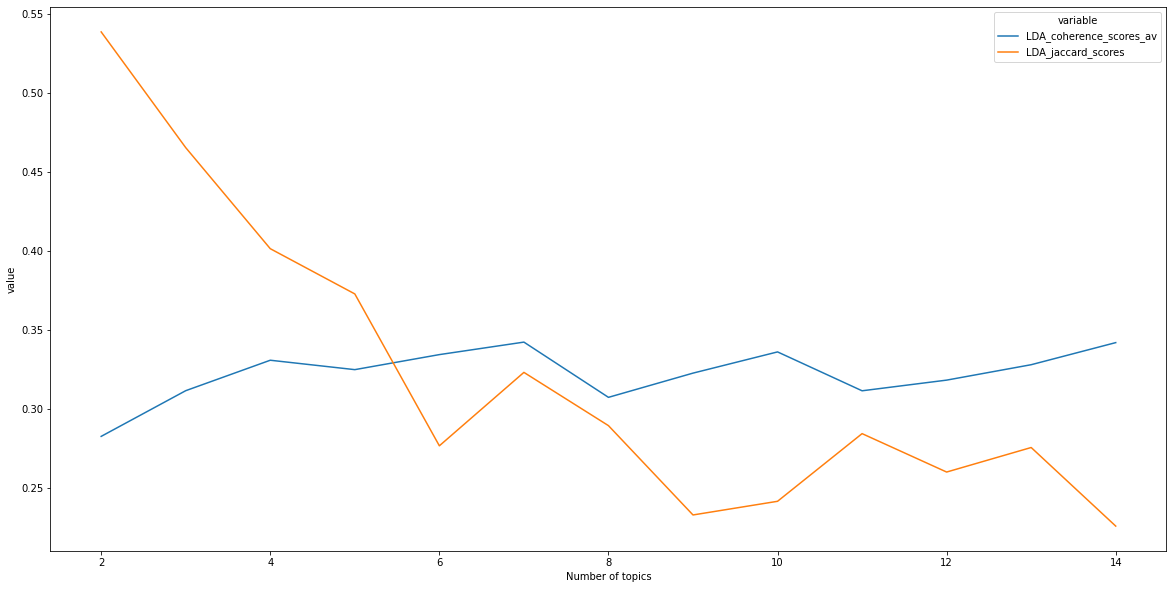

In [45]:
plt.figure(figsize=(20,10))
LDA = pd.DataFrame(list(zip(num_topics, LDA_coherence_scores_av, LDA_jaccard_scores)), 
                  columns = ['num_topics', 'LDA_coherence_scores_av', 'LDA_jaccard_scores'])
sns.lineplot(x = 'num_topics',
             y = 'value',
             hue = 'variable',
             data = pd.melt(LDA, ['num_topics']))
plt.xlabel('Number of topics')
plt.show()

In [46]:
lda_model = LDA_models[4]
lda_topics = lda_model.print_topics()
pprint(lda_topics)

[(0,
  '0.015*"charge" + 0.013*"tax" + 0.011*"federal" + 0.010*"service" + '
  '0.010*"fraud" + 0.007*"indictment" + 0.007*"information" + 0.006*"guilty" + '
  '0.006*"sentence" + 0.006*"trial"'),
 (1,
  '0.010*"service" + 0.009*"company" + 0.008*"include" + 0.008*"investigation" '
  '+ 0.007*"federal" + 0.006*"make" + 0.006*"right" + 0.006*"drug" + '
  '0.006*"civil" + 0.006*"crime"'),
 (2,
  '0.009*"fraud" + 0.009*"tax" + 0.008*"million" + 0.008*"federal" + '
  '0.008*"provide" + 0.007*"company" + 0.007*"health" + 0.006*"program" + '
  '0.006*"agreement" + 0.006*"include"'),
 (3,
  '0.009*"civil" + 0.008*"fraud" + 0.008*"federal" + 0.008*"investigation" + '
  '0.007*"right" + 0.007*"state" + 0.007*"service" + 0.007*"charge" + '
  '0.007*"program" + 0.007*"provide"'),
 (4,
  '0.009*"federal" + 0.008*"tax" + 0.008*"service" + 0.007*"civil" + '
  '0.007*"sentence" + 0.007*"include" + 0.007*"company" + '
  '0.006*"investigation" + 0.006*"right" + 0.006*"fraud"'),
 (5,
  '0.012*"charge" +

In [47]:
LDAvis_prepared_nouns = pyLDAvis.gensim.prepare(lda_model, corpus_content, id2word_content)
pyLDAvis.display(LDAvis_prepared_nouns)

/opt/homebrew/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/homebrew/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/homebrew/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/homebrew/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/homebrew/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour o

## NMF (Gensim)

Using same dictionary and corpus as earlier (min_df column)

In [48]:
num_topics = list(np.arange(2, 15, 1))
NMF_models = {}

for num in range(0, len(num_topics)):
    NMF_models[num] = Nmf(corpus=corpus_content, num_topics=num+2, id2word=id2word_content)

In [49]:
NMF_topics = {}
for num in range(0, len(num_topics)):
    NMF_topics[num] = NMF_models[num].print_topics()

In [50]:
pprint(NMF_topics)

{0: [(0,
      '0.012*"fraud" + 0.010*"charge" + 0.009*"service" + 0.008*"federal" + '
      '0.008*"tax" + 0.007*"include" + 0.007*"health" + 0.007*"million" + '
      '0.007*"company" + 0.007*"investigation"'),
     (1,
      '0.074*"sentence" + 0.045*"distribute" + 0.041*"month" + 0.039*"prison" '
      '+ 0.035*"offense" + 0.035*"release" + 0.035*"grant" + '
      '0.034*"supervised" + 0.026*"base" + 0.025*"conspiracy"')],
 1: [(0,
      '0.019*"tax" + 0.009*"federal" + 0.009*"return" + 0.008*"investigation" '
      '+ 0.008*"account" + 0.008*"irs" + 0.008*"bank" + 0.007*"information" + '
      '0.007*"include" + 0.007*"charge"'),
     (1,
      '0.092*"sentence" + 0.057*"distribute" + 0.051*"month" + 0.047*"prison" '
      '+ 0.044*"offense" + 0.044*"release" + 0.043*"grant" + '
      '0.043*"supervised" + 0.031*"base" + 0.030*"conspiracy"'),
     (2,
      '0.025*"fraud" + 0.018*"health" + 0.015*"medicare" + 0.014*"service" + '
      '0.014*"care" + 0.012*"charge" + 0.011*"progra

In [51]:
NMF_coherence_scores = {}
for num in range(0, len(num_topics)):
    NMF_coherence_scores[num] = [CoherenceModel(model=NMF_models[num],
                         texts=content_words,
                         dictionary=id2word_content,
                         coherence='c_v').get_coherence()]

In [52]:
NMF_coherence_scores_av = [np.array(list).mean() for list in [scores for scores in NMF_coherence_scores.values()]]

In [53]:
NMF_jaccard_scores = []
for i in [*range(0,len(num_topics))]:
    jaccards = []
    for j in list(combinations([*range(0,len(NMF_topics[i]))],2)):
        t1 = NMF_topics[i][j[0]]
        t2 = NMF_topics[i][j[1]]
        jaccards.append(jaccard_similarity(set(re.sub("[^A-Za-z ]", "", t1[1]).split("  ")), 
                                           set(re.sub("[^A-Za-z ]", "", t2[1]).split("  "))))
        mean = sum(jaccards)/len(jaccards)
    NMF_jaccard_scores.append(mean)

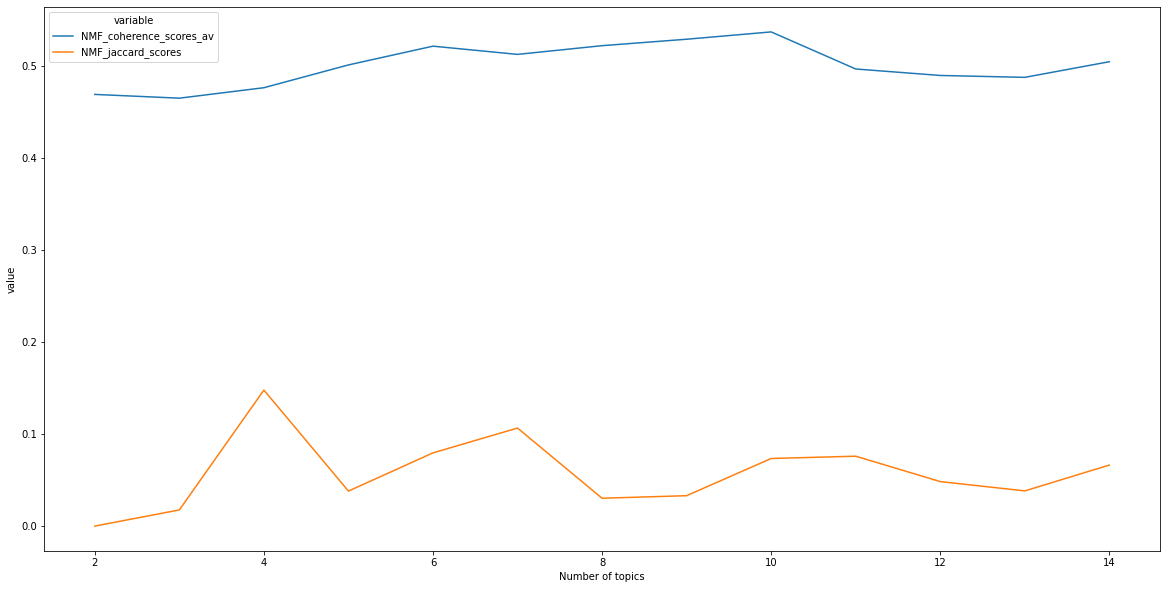

In [54]:
plt.figure(figsize=(20,10))

NMF = pd.DataFrame(list(zip(num_topics, NMF_coherence_scores_av, NMF_jaccard_scores)), 
                  columns = ['num_topics', 'NMF_coherence_scores_av', 'NMF_jaccard_scores'])
sns.lineplot(x = 'num_topics',
             y = 'value',
             hue = 'variable',
             data = pd.melt(NMF, ['num_topics']))
plt.xlabel('Number of topics')
plt.show()

In [55]:
best_nmf_model = NMF_models[6]
best_nmf_topics = best_nmf_model.print_topics()
pprint(best_nmf_topics)

[(0,
  '0.029*"officer" + 0.020*"right" + 0.018*"police" + 0.015*"federal" + '
  '0.014*"trial" + 0.013*"member" + 0.011*"evidence" + 0.011*"crime" + '
  '0.011*"state" + 0.010*"civil"'),
 (1,
  '0.014*"civil" + 0.014*"settlement" + 0.013*"company" + 0.011*"government" + '
  '0.009*"federal" + 0.009*"agreement" + 0.008*"state" + 0.008*"antitrust" + '
  '0.007*"new" + 0.007*"right"'),
 (2,
  '0.076*"tax" + 0.047*"account" + 0.037*"bank" + 0.033*"irs" + 0.028*"return" '
  '+ 0.018*"income" + 0.015*"client" + 0.015*"taxpayer" + 0.013*"file" + '
  '0.012*"service"'),
 (3,
  '0.029*"fraud" + 0.020*"charge" + 0.017*"scheme" + 0.016*"tax" + '
  '0.015*"company" + 0.014*"guilty" + 0.012*"accord" + 0.011*"investigation" + '
  '0.011*"financial" + 0.011*"return"'),
 (4,
  '0.105*"sentence" + 0.071*"distribute" + 0.061*"month" + 0.054*"grant" + '
  '0.054*"offense" + 0.053*"release" + 0.052*"supervised" + 0.050*"prison" + '
  '0.036*"base" + 0.031*"drug"'),
 (5,
  '0.020*"award" + 0.015*"child" +

## NMF TFIDF (Gensim)

NMF using gensim. The contents of the model are still not as informative as sklearn's but coherence was able to be measured. No Jaccard.

In [56]:
#contents['lemma_tokens'] = [word_tokenize(i) for i in contents['lemma']] 
#contents['lemma_tokens'] = contents['lemma_tokens'].apply(remove_stopwords_2)

# Use Gensim's NMF to get the best num of topics via coherence score
texts = contents['tokens']

# Create a dictionary
# In gensim a dictionary is a mapping between words and their integer id
dictionary = Dictionary(texts)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(
    no_below=0.05,
    no_above=0.9,
)

# Create the bag-of-words format (list of (token_id, token_count))
corpus = [dictionary.doc2bow(text) for text in texts]

Coherence Scores: [(2, 0.58451), (3, 0.62615), (4, 0.58606), (5, 0.64862), (6, 0.60631), (7, 0.57489), (8, 0.58557), (9, 0.6119), (10, 0.53821), (11, 0.60628), (12, 0.57196), (13, 0.59955), (14, 0.55247)]
5


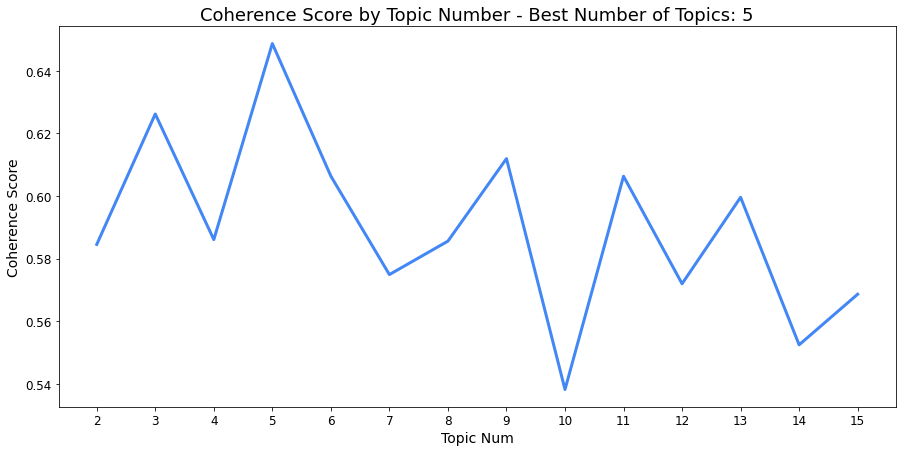

In [57]:
# Create a list of the topic numbers we want to try
topic_nums = list(np.arange(2, 15 + 1, 1))

# Run the nmf model and calculate the coherence score
# for each number of topics
coherence_scores = []

for num in topic_nums:
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary
    )
    
    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    
    coherence_scores.append(round(cm.get_coherence(), 5))

# Get the number of topics with the highest coherence score
scores = list(zip(num_topics, coherence_scores))
print('Coherence Scores:', scores)
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]
print(best_num_topics)

# Plot the results
fig = plt.figure(figsize=(15, 7))

plt.plot(
    topic_nums,
    coherence_scores,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Topic Num", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
plt.title('Coherence Score by Topic Number - Best Number of Topics: {}'.format(best_num_topics), fontsize=18)
plt.xticks(np.arange(2, max(topic_nums) + 1, 1), fontsize=12)
plt.yticks(fontsize=12)


plt.show()

In [58]:
nmf_model = Nmf(corpus=corpus, num_topics=11, id2word=dictionary)
pprint(nmf_model.print_topics())

[(0,
  '0.012*"fbi" + 0.010*"security" + 0.009*"national" + 0.008*"provide" + '
  '0.008*"charge" + 0.008*"information" + 0.007*"guilty" + 0.007*"agent" + '
  '0.007*"child" + 0.007*"foreign"'),
 (1,
  '0.019*"charge" + 0.016*"member" + 0.016*"new" + 0.016*"indictment" + '
  '0.012*"gang" + 0.010*"york" + 0.010*"federal" + 0.009*"crime" + '
  '0.008*"state" + 0.008*"murder"'),
 (2,
  '0.014*"company" + 0.009*"settlement" + 0.006*"government" + 0.006*"civil" + '
  '0.005*"million" + 0.005*"pay" + 0.005*"agreement" + 0.004*"compliance" + '
  '0.004*"require" + 0.004*"antitrust"'),
 (3,
  '0.073*"tax" + 0.033*"return" + 0.020*"irs" + 0.016*"false" + 0.015*"file" + '
  '0.014*"income" + 0.012*"federal" + 0.011*"claim" + 0.010*"business" + '
  '0.010*"prepare"'),
 (4,
  '0.053*"sentence" + 0.044*"imprisonment" + 0.042*"distribute" + '
  '0.038*"cocaine" + 0.033*"month" + 0.032*"intent" + 0.032*"commutation" + '
  '0.032*"commute" + 0.031*"offense" + 0.031*"grant"'),
 (5,
  '0.039*"account" 

## NMF TFIDF 2nd Attempt (Sklearn)

Attempt to use sklearn NMF model. Wasn't able to calculate jaccard or coherence.

In [59]:
#removing extra stop words
stop_words = text.ENGLISH_STOP_WORDS

vectorizer = TfidfVectorizer(stop_words=stop_words, ngram_range = (1,1), max_df = 0.9, min_df=0.05)

contents_transform = vectorizer.fit_transform(contents.lemma)

contents_dataframe = pd.DataFrame(contents_transform.toarray(), columns = vectorizer.get_feature_names())

contents_dataframe.index = contents.index

contents_dataframe.head()

,10,100,11,12,13,14,15,16,17,18,...,wire,witness,woman,work,world,write,wwwjusticegov,year,yesterday,york
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.020615,0.0,0.086766,0.061939,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.009947,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.003974,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.066959,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.070132,0.0,0.073794,0.000000,0.058501,0.142533,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.058326,0.000000,0.000000,...,0.0,0.0,0.109350,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.352423,...,0.0,0.0,0.058707,0.000000,0.0,0.000000,0.000000,0.103173,0.000000,0.0


In [60]:
#iterate through topics
def display_topics(model, feature_names, num_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic", ix)
        else:
            print("\nTopic: '", topic_names[ix], "'")
        print(",".join([feature_names[i] \
            for i in topic.argsort()[:-num_top_words - 1:-1]]))

In [61]:
contents

,date,contents_processed,lemma,tokens,max_df
0,2018-07-27,the us district court for the northern distric...,the us district court for the northern distric...,"[northern, illinois, enter, permanent, injunct...","[northern, enter, injunction, three, relate, c..."
1,2018-07-27,the department of justice announced today that...,the department of justice announce today that ...,"[announce, swiss, base, mireli, hold, sa, reac...","[announce, base, hold, reach, resolution, tax,..."
2,2018-07-27,yesterday a federal judge found ahmed el-sheri...,yesterday a federal judge find ahmed el - sher...,"[federal, judge, find, ahmed, el, sherif, owne...","[federal, judge, find, owner, safety, officer,..."
3,2018-07-26,the department of justice announced today that...,the department of justice announce today that ...,"[announce, company, headquarter, st, paul, min...","[announce, company, paul, agree, pay, million,..."
4,2018-07-26,a federal grand jury in new orleans louisiana ...,a federal grand jury in new orleans louisiana ...,"[federal, grand, jury, new, orleans, louisiana...","[federal, grand, jury, new, return, six, count..."
...,...,...,...,...,...
17819,2018-07-30,washington – a jordanian national residing in ...,washington – a jordanian national reside in mo...,"[washington, jordanian, national, reside, mont...","[washington, national, arrest, international, ..."
17820,2018-07-30,a charlottesville virginia man was sentenced t...,a charlottesville virginia man be sentence tod...,"[charlottesville, virginia, sentence, month, p...","[virginia, sentence, month, prison, child, ann..."
17821,2018-07-30,a federal jury convicted a sterling virginia w...,a federal jury convict a sterling virginia wom...,"[federal, jury, convict, sterling, virginia, w...","[federal, jury, convict, virginia, woman, heal..."
17822,2018-07-30,remarks as prepared for delivery\r\nthank you ...,remark as prepare for delivery \r\n thank you ...,"[remark, prepare, delivery, thank, beth, gener...","[prepare, thank, thank, leadership, legal, pol..."


In [62]:
contents['lemma_tokens'] = [word_tokenize(i) for i in contents['lemma']] 

# Use Gensim's NMF to get the best num of topics via coherence score
texts = contents['lemma_tokens']

# Create a dictionary
# In gensim a dictionary is a mapping between words and their integer id
dictionary = Dictionary(texts)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(
    no_below=0.05,
    no_above=0.9,
)

# Create the bag-of-words format (list of (token_id, token_count))
corpus = [dictionary.doc2bow(text) for text in texts]

In [63]:
def convert(list):
    return tuple(list)

In [66]:
num_topics = list(np.arange(2, 15, 1))
topic_models = []
dicts = {}
coherence_scores = []
# try each value of k
for k in num_topics:
    print("\n" + "Applying NMF for k=%d ..." % k)
    # run NMF
    model = NMF(k) 
    W = model.fit_transform(contents_dataframe)
    H = convert(model.components_)   
    # store for later
    dicts[k] = convert(H)
    display_topics(model, vectorizer.get_feature_names(), 10)
    topic_models.append((k,W,H))
    
    


Applying NMF for k=2 ...

Topic 0
fraud,district,charge,office,criminal,division,right,medicare,health,law

Topic 1
tax,return,irs,income,refund,false,prepare,preparer,file,business

Applying NMF for k=3 ...

Topic 0
right,district,charge,law,criminal,division,civil,office,victim,fbi

Topic 1
tax,return,irs,income,false,refund,prepare,preparer,file,business

Topic 2
medicare,health,fraud,care,hhs,patient,oig,claim,service,medical

Applying NMF for k=4 ...

Topic 0
charge,criminal,indictment,district,fbi,sentence,guilty,defendant,count,victim

Topic 1
tax,return,irs,income,false,refund,prepare,preparer,file,business

Topic 2
medicare,health,fraud,care,hhs,patient,oig,claim,service,medical

Topic 3
right,civil,settlement,discrimination,act,housing,law,agreement,disability,say

Applying NMF for k=5 ...

Topic 0
charge,indictment,criminal,district,fbi,defendant,guilty,conspiracy,count,sentence

Topic 1
tax,return,irs,income,refund,false,prepare,preparer,file,business

Topic 2
medicare,hea

In [67]:
dicts

{2: (array([0.21451388, 0.06707475, 0.1175106 , 0.12112881, 0.14728494,
         0.11989364, 0.15959103, 0.09982624, 0.08780416, 0.12515239,
         0.14399085, 0.19435863, 0.06574288, 0.09626045, 0.14233221,
         0.17402857, 0.16924607, 0.25621003, 0.20970408, 0.21252306,
         0.19677048, 0.17832691, 0.18611375, 0.19056684, 0.16520027,
         0.16561177, 0.12997278, 0.12111239, 0.15033474, 0.09759627,
         0.09691849, 0.09624978, 0.10946847, 0.11663747, 0.13920335,
         0.08561112, 0.0901344 , 0.09080295, 0.09152253, 0.1595225 ,
         0.07627139, 0.07472723, 0.08117754, 0.07190044, 0.1446333 ,
         0.07106246, 0.07217584, 0.24571905, 0.11228401, 0.21120262,
         0.38228331, 0.22444468, 0.09052889, 0.17269285, 0.10025921,
         0.70835009, 0.27988255, 0.2298485 , 0.21635679, 0.15859885,
         0.06854225, 0.15154212, 0.17601662, 0.08703702, 0.43722246,
         0.07276251, 0.12438955, 0.36150327, 0.49130834, 0.08641962,
         0.2906448 , 0.4356071 

Attempting to apply jaccard function from earlier to this dictionary with no success.

In [ ]:
NMF_jaccard_scores = []

for i in [*num_topics]:
    jaccards = []
    for j in list(combinations([*range(len(dicts[i]))], 2)):
        t1 = dicts[i][j[0]]
        t2 = dicts[i][j[1]]
        jaccards.append(jaccard_similarity((t1[1]), 
                                           (t2[1])))
        mean = sum(jaccards)/len(jaccards)
    NMF_jaccard_scores.append(mean)

In [ ]:
for i in [*num_topics]:
    jaccards = []
    for j in list(combinations([*range(len(dicts[i]))], 2)):
        t1 = dicts[i][j[0]]
        t2 = dicts[i][j[1]]
        print (t1[1]).split(" ")

In [ ]:
NMF_jaccard_scores

## NMF TFIDF 3rd Attempt (Sklearn)

Adapting [this script](https://github.com/derekgreene/topic-model-tutorial/blob/master/3%20-%20Parameter%20Selection%20for%20NMF.ipynb), I was able to use sklearn's NMF model and calculate coherence. Coherence is lower than the gensim model but I am still unable ot calculate jaccard. Informative topics have been produced! This has also been the fastest model yet.

In [68]:
from pathlib import Path
import operator, joblib

In [69]:
snippets = contents['lemma'].tolist()

Couldn't use max_df because gensim's Word2Vec (which is used a few blocks later) doesn't have that feature. TFIDF and Word2Vec have to match for the code to work.

In [70]:
vectorizer = TfidfVectorizer(stop_words=stop_words, min_df = 0.05)
A = vectorizer.fit_transform(contents.lemma)
print( "Created %d X %d TF-IDF-normalized document-term matrix" % (A.shape[0], A.shape[1]) )

Created 17824 X 831 TF-IDF-normalized document-term matrix


In [71]:
terms =  list(vectorizer.get_feature_names_out())
print("Vocabulary has %d distinct terms" % len(terms))

Vocabulary has 831 distinct terms


In [72]:
joblib.dump((A,terms,snippets), "data/contents-tfidf.pkl") 

['data/contents-tfidf.pkl']

In [73]:
(A,terms,snippets) = joblib.load("data/contents-tfidf.pkl")
print( "Loaded %d X %d document-term matrix" % (A.shape[0], A.shape[1]) )

Loaded 17824 X 831 document-term matrix


In [74]:
kmin, kmax = 4, 20

In [75]:
topic_models = []
# try each value of k
for k in range(kmin,kmax+1):
    print("Applying NMF for k=%d ..." % k )
    # run NMF
    model = NMF( init="nndsvd", n_components=k ) 
    W = model.fit_transform( A )
    H = model.components_    
    # store for later
    topic_models.append( (k,W,H) )

Applying NMF for k=4 ...
Applying NMF for k=5 ...
Applying NMF for k=6 ...
Applying NMF for k=7 ...
Applying NMF for k=8 ...
Applying NMF for k=9 ...
Applying NMF for k=10 ...
Applying NMF for k=11 ...
Applying NMF for k=12 ...
Applying NMF for k=13 ...
Applying NMF for k=14 ...
Applying NMF for k=15 ...
Applying NMF for k=16 ...
Applying NMF for k=17 ...
Applying NMF for k=18 ...
Applying NMF for k=19 ...
Applying NMF for k=20 ...


In [76]:
topic_models

[(4,
  array([[0.01153452, 0.00373556, 0.01269398, 0.06216403],
         [0.00997982, 0.04066921, 0.00061403, 0.01977163],
         [0.03717104, 0.        , 0.00321799, 0.06118804],
         ...,
         [0.03136681, 0.0239143 , 0.12152845, 0.        ],
         [0.01871612, 0.        , 0.        , 0.09558471],
         [0.03717104, 0.        , 0.00321799, 0.06118804]]),
  array([[0.24915693, 0.06778125, 0.11792949, ..., 0.62648907, 0.13343255,
          0.41604534],
         [0.02348111, 0.01002942, 0.01020002, ..., 0.31999571, 0.0449125 ,
          0.03113466],
         [0.05280613, 0.01123575, 0.03385788, ..., 0.03987882, 0.0202818 ,
          0.0369021 ],
         [0.0247441 , 0.02007365, 0.02946068, ..., 0.14813526, 0.00254361,
          0.07129716]])),
 (5,
  array([[0.01397865, 0.00318071, 0.01106054, 0.05956463, 0.        ],
         [0.01428543, 0.03867512, 0.        , 0.01705283, 0.        ],
         [0.03472343, 0.        , 0.00294925, 0.06135637, 0.00508937],
         ...

In [77]:
contents['lemma_tokens'] = [word_tokenize(i) for i in contents['lemma']] 

w2v_model = gensim.models.Word2Vec(contents['lemma_tokens'], min_count=0.05, sg=1)

In [78]:
def calculate_coherence( w2v_model, term_rankings ):
    overall_coherence = 0.0
    for topic_index in range(len(term_rankings)):
        # check each pair of terms
        pair_scores = []
        for pair in combinations( term_rankings[topic_index], 2 ):
            pair_scores.append( w2v_model.wv.similarity(pair[0], pair[1]) )
        # get the mean for all pairs in this topic
        topic_score = sum(pair_scores) / len(pair_scores)
        overall_coherence += topic_score
    # get the mean score across all topics
    return overall_coherence / len(term_rankings)


def jaccard_similarity(w2v_model, term_rankings):
    overall_jaccard = 0.0
    for topic_index in range(len(term_rankings)):
        pair_scores = []
        for pair in combinations (term_rankings[topic_index], 2):
            intersection = set(pair[0]).intersection(set(pair[1]))
            union = set(pair[0]).union(set(pair[1]))
            pair_scores.append(float(len(intersection))/float(len(union)))
        topic_score = sum(pair_scores) / len(pair_scores)
        overall_jaccard += topic_score
    return overall_jaccard / len(term_rankings)

In [79]:
def get_descriptor( all_terms, H, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append( all_terms[term_index] )
    return top_terms

In [80]:
k_values = []
coherences = []
jaccards = []
for (k,W,H) in topic_models:
    # Get all of the topic descriptors - the term_rankings, based on top 10 terms
    term_rankings = []
    for topic_index in range(k):
        term_rankings.append( get_descriptor( terms, H, topic_index, 10 ) )
    # Now calculate the coherence based on our Word2vec model
    k_values.append( k )
    coherences.append( calculate_coherence( w2v_model, term_rankings ) )
    jaccards.append( jaccard_similarity( w2v_model, term_rankings ) )
    print("K=%02d: Coherence=%.4f" % ( k, coherences[-1] ) )
    print("K=%02d: Jaccard=%.4f" % ( k, jaccards[-1] ) + "\n")

K=04: Coherence=0.4273
K=04: Jaccard=0.2113

K=05: Coherence=0.4147
K=05: Jaccard=0.2085

K=06: Coherence=0.4142
K=06: Jaccard=0.2144

K=07: Coherence=0.4227
K=07: Jaccard=0.2161

K=08: Coherence=0.4161
K=08: Jaccard=0.2110

K=09: Coherence=0.4214
K=09: Jaccard=0.2179

K=10: Coherence=0.4193
K=10: Jaccard=0.2057

K=11: Coherence=0.4178
K=11: Jaccard=0.2067

K=12: Coherence=0.4103
K=12: Jaccard=0.2031

K=13: Coherence=0.4101
K=13: Jaccard=0.2054

K=14: Coherence=0.4112
K=14: Jaccard=0.2090

K=15: Coherence=0.4164
K=15: Jaccard=0.2141

K=16: Coherence=0.4168
K=16: Jaccard=0.2106

K=17: Coherence=0.4114
K=17: Jaccard=0.2097

K=18: Coherence=0.4143
K=18: Jaccard=0.2095

K=19: Coherence=0.4100
K=19: Jaccard=0.2123

K=20: Coherence=0.4083
K=20: Jaccard=0.2138



In [ ]:
k_values

Based on the two figure's below, the best coherence is at k=12 and the best jaccard is at k=9. I would assume then, the best k would be between 9 and 12. There is a steep drop at k=10 for jaccard, so I might assume k=9 is the best here. Potentially k=15 could also be appropriate.

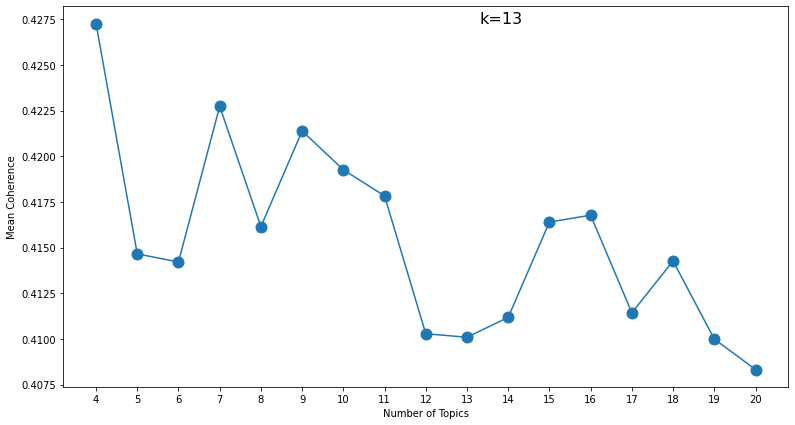

In [81]:
fig = plt.figure(figsize=(13,7))
# create the line plot
ax = plt.plot( k_values, coherences )
plt.xticks(k_values)
plt.xlabel("Number of Topics")
plt.ylabel("Mean Coherence")
# add the points
plt.scatter(k_values, coherences, s=120)
# find and annotate the maximum point on the plot
ymin = min(coherences)
ymax = max(coherences)
xpos = coherences.index(ymin)
#best_k = k_values[xpos]
best_k = k_values[9] #manually set the best k value
plt.annotate("k=%d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points", fontsize=16)
# show the plot
plt.show()

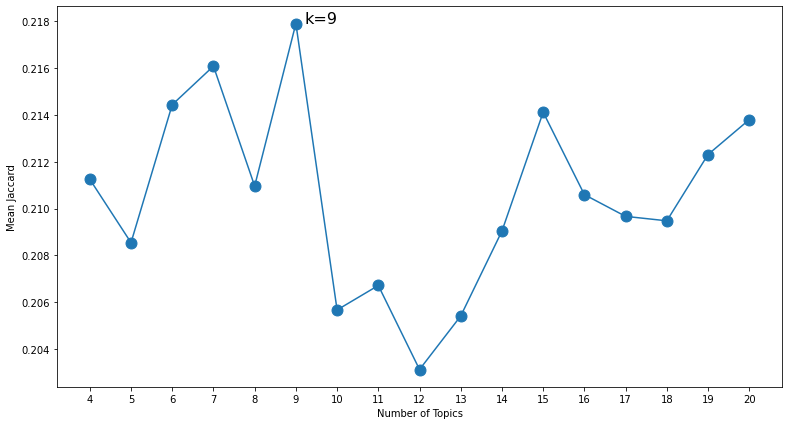

In [84]:
fig = plt.figure(figsize=(13,7))
# create the line plot
ax = plt.plot( k_values, jaccards )
plt.xticks(k_values)
plt.xlabel("Number of Topics")
plt.ylabel("Mean Jaccard")
# add the points
plt.scatter(k_values, jaccards, s=120)
# find and annotate the maximum point on the plot
ymin = min(jaccards)
ymax = max(jaccards)
xpos = jaccards.index(ymin)
#best_k = k_values[xpos]
best_k = k_values[5] #manually set the best k value
plt.annotate("k=%d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points", fontsize=16)
# show the plot
plt.show()

Plotted both jaccard and coherence, but it might actually be easier to see the best k based on the separated plots above.

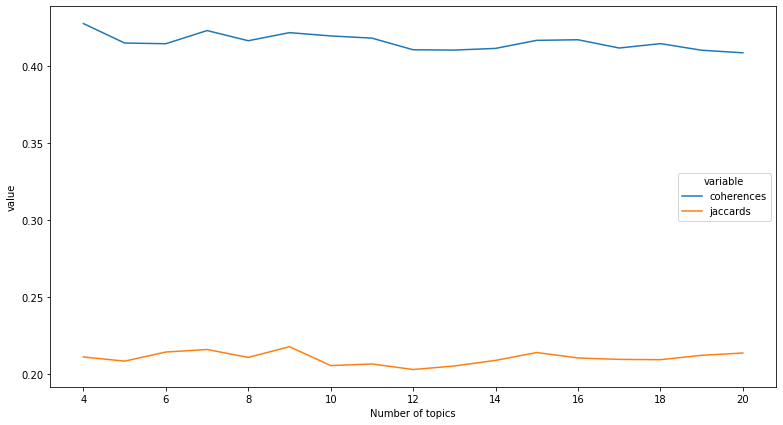

In [85]:
plt.figure(figsize=(13,7))
NMF_sklearn = pd.DataFrame(list(zip(k_values, coherences, jaccards)), 
                  columns = ['num_topics', 'coherences', 'jaccards'])
sns.lineplot(x = 'num_topics',
             y = 'value',
             hue = 'variable',
             data = pd.melt(NMF_sklearn, ['num_topics']))
plt.xlabel('Number of topics')
plt.show()

In [96]:
best_k = k_values[11]
k = best_k
# get the model that we generated earlier.
W = topic_models[k-kmin][1]
H = topic_models[k-kmin][2]

Chose k=12 as the best k. Lowest Coherence for lowest number of topics

In [97]:
for topic_index in range(k):
    descriptor = get_descriptor(terms, H, topic_index, 10)
    str_descriptor = ", ".join( descriptor )
    print("Topic %02d: %s" % (topic_index+1, str_descriptor) )

Topic 01: fraud, criminal, scheme, bank, company, financial, money, guilty, bribe, account
Topic 02: tax, irs, income, return, taxis, refund, attorney, false, file, account
Topic 03: medicare, health, fraud, care, hhs, oig, patient, strike, medical, home
Topic 04: environmental, settlement, decree, environment, consent, natural, facility, compliance, resource, require
Topic 05: right, officer, civil, assault, attorney, victim, police, division, department, fbi
Topic 06: child, sexual, project, safe, abuse, victim, internet, attorney, exploit, district
Topic 07: housing, disability, fair, discrimination, right, civil, lawsuit, race, department, act
Topic 08: indictment, charge, count, allege, defendant, presume, innocent, allegedly, prove, maximum
Topic 09: antitrust, price, competition, industry, fine, market, division, propose, consumer, conspiracy
Topic 10: law, community, crime, enforcement, violence, justice, program, department, local, work
Topic 11: security, national, united, fb

## BTM Model

In [98]:
texts = contents['lemma'].str.strip().tolist()

In [99]:
# PREPROCESSING
# Obtaining terms frequency in a sparse matrix and corpus vocabulary
X, vocabulary, vocab_dict = btm.get_words_freqs(texts)
tf = np.array(X.sum(axis=0)).ravel()
# Vectorizing documents
docs_vec = btm.get_vectorized_docs(texts, vocabulary)
docs_lens = list(map(len, docs_vec))
# Generating biterms
biterms = btm.get_biterms(docs_vec)

KeyboardInterrupt: 

In [90]:
# INITIALIZING AND RUNNING MODEL
model = btm.BTM(
    X, vocabulary, seed=12321, T=8, M=10, alpha=50/8, beta=0.01)
model.fit(biterms, iterations=20)
p_zd = model.transform(docs_vec)

100%|███████████████████████████████████| 17824/17824 [00:03<00:00, 5608.71it/s]


In [ ]:
p_zdzd

## Presidency Split

Splitting data based on presidency. Attorney generals are appointed by the president. Seeing if there is some variation of topics between presidencies. The hypothesis is that there will be less prosecution of hate crimes during the Trump presidency despite an increase in hate crimes due to COVID-19. During this time, there were the black live matter protests, where marginalized groups were calling for justice.

Will focus only on NMF with Sklearn as it performed the best previously

In [102]:
contents.dropna(subset = ['date'], inplace=True)
obama = contents.loc[contents['date'].str.contains('2013|2014|2015|2016')]
trump = contents.loc[contents['date'].str.contains('2017|2018|2019|2020')]

### Trump

In [103]:
snippets = trump['lemma'].tolist()

In [105]:
vectorizer = TfidfVectorizer(stop_words=stop_words, min_df = 0.05)
A = vectorizer.fit_transform(trump.lemma)
print( "Created %d X %d TF-IDF-normalized document-term matrix" % (A.shape[0], A.shape[1]) )

Created 5814 X 891 TF-IDF-normalized document-term matrix


In [106]:
terms =  list(vectorizer.get_feature_names_out())
print("Vocabulary has %d distinct terms" % len(terms))

Vocabulary has 891 distinct terms


In [107]:
joblib.dump((A,terms,snippets), "data/trump-tfidf.pkl") 

['data/trump-tfidf.pkl']

In [144]:
(A,terms,snippets) = joblib.load("data/trump-tfidf.pkl")
print( "Loaded %d X %d document-term matrix" % (A.shape[0], A.shape[1]) )

Loaded 5814 X 891 document-term matrix


In [110]:
kmin, kmax = 4, 20

In [145]:
topic_models = []
# try each value of k
for k in range(kmin,kmax+1):
    print("Applying NMF for k=%d ..." % k )
    # run NMF
    model = NMF( init="nndsvd", n_components=k ) 
    W = model.fit_transform( A )
    H = model.components_    
    # store for later
    topic_models.append( (k,W,H) )

Applying NMF for k=4 ...
Applying NMF for k=5 ...
Applying NMF for k=6 ...
Applying NMF for k=7 ...
Applying NMF for k=8 ...
Applying NMF for k=9 ...
Applying NMF for k=10 ...
Applying NMF for k=11 ...
Applying NMF for k=12 ...
Applying NMF for k=13 ...
Applying NMF for k=14 ...
Applying NMF for k=15 ...
Applying NMF for k=16 ...
Applying NMF for k=17 ...
Applying NMF for k=18 ...
Applying NMF for k=19 ...
Applying NMF for k=20 ...


In [146]:
trump['lemma_tokens'] = [word_tokenize(i) for i in trump['lemma']] 

w2v_model = gensim.models.Word2Vec(trump['lemma_tokens'], min_count=0.05, sg=1)

In [147]:
k_values = []
coherences = []
jaccards = []
for (k,W,H) in topic_models:
    # Get all of the topic descriptors - the term_rankings, based on top 10 terms
    term_rankings = []
    for topic_index in range(k):
        term_rankings.append( get_descriptor( terms, H, topic_index, 10 ) )
    # Now calculate the coherence based on our Word2vec model
    k_values.append( k )
    coherences.append( calculate_coherence( w2v_model, term_rankings ) )
    jaccards.append( jaccard_similarity( w2v_model, term_rankings ) )
    print("K=%02d: Coherence=%.4f" % ( k, coherences[-1] ) )
    print("K=%02d: Jaccard=%.4f" % ( k, jaccards[-1] ) + "\n")

K=04: Coherence=0.4117
K=04: Jaccard=0.1987

K=05: Coherence=0.4029
K=05: Jaccard=0.1876

K=06: Coherence=0.4076
K=06: Jaccard=0.2108

K=07: Coherence=0.4180
K=07: Jaccard=0.2100

K=08: Coherence=0.4179
K=08: Jaccard=0.2008

K=09: Coherence=0.4201
K=09: Jaccard=0.2079

K=10: Coherence=0.4201
K=10: Jaccard=0.2067

K=11: Coherence=0.4190
K=11: Jaccard=0.2173

K=12: Coherence=0.4128
K=12: Jaccard=0.2000

K=13: Coherence=0.4136
K=13: Jaccard=0.2050

K=14: Coherence=0.4126
K=14: Jaccard=0.2052

K=15: Coherence=0.4086
K=15: Jaccard=0.2126

K=16: Coherence=0.4087
K=16: Jaccard=0.2102

K=17: Coherence=0.4029
K=17: Jaccard=0.2055

K=18: Coherence=0.4074
K=18: Jaccard=0.2135

K=19: Coherence=0.4084
K=19: Jaccard=0.2135

K=20: Coherence=0.4063
K=20: Jaccard=0.2124



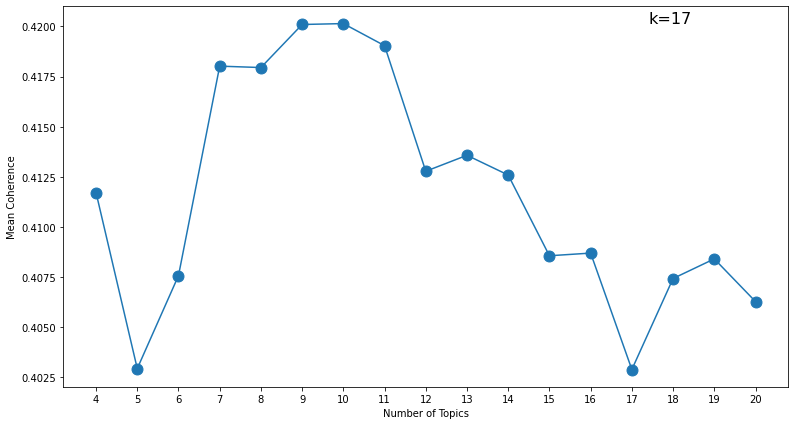

In [148]:
fig = plt.figure(figsize=(13,7))
# create the line plot
ax = plt.plot( k_values, coherences )
plt.xticks(k_values)
plt.xlabel("Number of Topics")
plt.ylabel("Mean Coherence")
# add the points
plt.scatter(k_values, coherences, s=120)
# find and annotate the maximum point on the plot
ymin = min(coherences)
ymax = max(coherences)
xpos = coherences.index(ymin)
#best_k = k_values[xpos]
best_k = k_values[13] #manually set the best k value
plt.annotate("k=%d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points", fontsize=16)
# show the plot
plt.show()

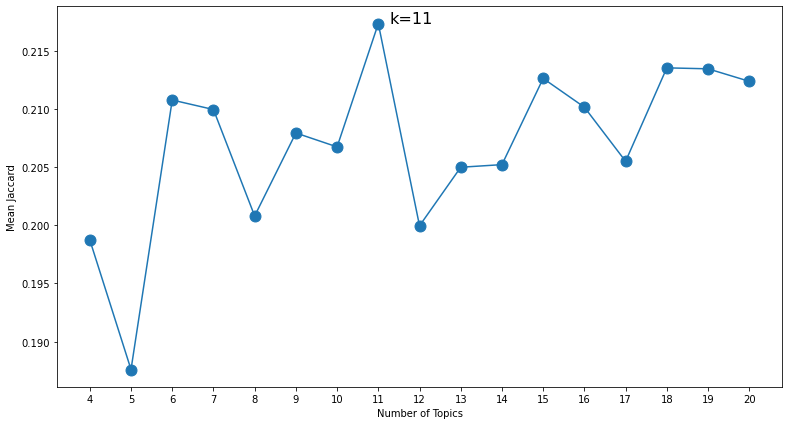

In [149]:
fig = plt.figure(figsize=(13,7))
# create the line plot
ax = plt.plot( k_values, jaccards )
plt.xticks(k_values)
plt.xlabel("Number of Topics")
plt.ylabel("Mean Jaccard")
# add the points
plt.scatter(k_values, jaccards, s=120)
# find and annotate the maximum point on the plot
ymin = min(jaccards)
ymax = max(jaccards)
xpos = jaccards.index(ymin)
#best_k = k_values[xpos]
best_k = k_values[7] #manually set the best k value
plt.annotate("k=%d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points", fontsize=16)
# show the plot
plt.show()

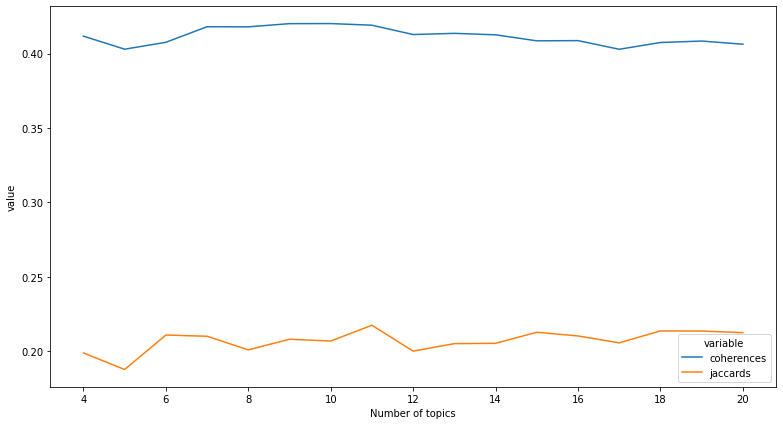

In [150]:
plt.figure(figsize=(13,7))
NMF_sklearn = pd.DataFrame(list(zip(k_values, coherences, jaccards)), 
                  columns = ['num_topics', 'coherences', 'jaccards'])
sns.lineplot(x = 'num_topics',
             y = 'value',
             hue = 'variable',
             data = pd.melt(NMF_sklearn, ['num_topics']))
plt.xlabel('Number of topics')
plt.show()

Looking at 2 best possible topics models (5 and 17)

In [151]:
best_k = k_values[2]
k = best_k
# get the model that we generated earlier.
W = topic_models[k-kmin][1]
H = topic_models[k-kmin][2]

In [152]:
for topic_index in range(k):
    descriptor = get_descriptor(terms, H, topic_index, 10)
    str_descriptor = ", ".join( descriptor )
    print("Topic %02d: %s" % (topic_index+1, str_descriptor) )

Topic 01: indictment, charge, attorney, criminal, district, fraud, count, fbi, defendant, guilty
Topic 02: tax, return, irs, income, zuckerman, deputy, attorney, principal, file, division
Topic 03: medicare, health, fraud, care, hhs, patient, strike, oig, kickback, claim
Topic 04: settlement, antitrust, civil, department, right, discrimination, division, act, complaint, agreement
Topic 05: law, crime, officer, drug, enforcement, police, violent, community, attorney, department
Topic 06: child, sexual, exploitation, project, safe, victim, virginia, attorney, abuse, district


In [153]:
best_k = k_values[13]
k = best_k
# get the model that we generated earlier.
W = topic_models[k-kmin][1]
H = topic_models[k-kmin][2]

In [154]:
for topic_index in range(k):
    descriptor = get_descriptor(terms, H, topic_index, 10)
    str_descriptor = ", ".join( descriptor )
    print("Topic %02d: %s" % (topic_index+1, str_descriptor) )

Topic 01: terrorist, attack, security, fbi, al, terrorism, national, support, travel, york
Topic 02: tax, return, irs, income, zuckerman, deputy, attorney, principal, refund, file
Topic 03: medicare, fraud, health, care, hhs, strike, oig, patient, kickback, force
Topic 04: settlement, claim, resolve, false, health, allegation, program, government, patient, civil
Topic 05: law, united, states, government, policy, issue, work, department, american, attorney
Topic 06: child, exploitation, project, safe, sexual, virginia, attorney, abuse, internet, district
Topic 07: right, officer, civil, assault, attorney, division, fbi, law, district, police
Topic 08: antitrust, competition, price, market, division, propose, industry, consumer, fine, review
Topic 09: drug, dea, trafficking, prescription, substance, distribute, enforcement, crisis, patient, control
Topic 10: fraud, criminal, company, scheme, bank, money, district, account, guilty, attorney
Topic 11: indictment, charge, allege, count, def

### Obama

In [125]:
snippets = obama['lemma'].tolist()

In [126]:
vectorizer = TfidfVectorizer(stop_words=stop_words, min_df = 0.05)
A = vectorizer.fit_transform(obama.lemma)
print( "Created %d X %d TF-IDF-normalized document-term matrix" % (A.shape[0], A.shape[1]) )

Created 5736 X 798 TF-IDF-normalized document-term matrix


In [127]:
terms =  list(vectorizer.get_feature_names_out())
print("Vocabulary has %d distinct terms" % len(terms))

Vocabulary has 798 distinct terms


In [128]:
joblib.dump((A,terms,snippets), "data/obama-tfidf.pkl") 

['data/obama-tfidf.pkl']

Rerun from here to rerun Obama NMF as the variables are not specific to a model

In [155]:
(A,terms,snippets) = joblib.load("data/obama-tfidf.pkl")
print( "Loaded %d X %d document-term matrix" % (A.shape[0], A.shape[1]) )

Loaded 5736 X 798 document-term matrix


In [156]:
topic_models = []
# try each value of k
for k in range(kmin,kmax+1):
    print("Applying NMF for k=%d ..." % k )
    # run NMF
    model = NMF( init="nndsvd", n_components=k ) 
    W = model.fit_transform( A )
    H = model.components_    
    # store for later
    topic_models.append( (k,W,H) )

Applying NMF for k=4 ...
Applying NMF for k=5 ...
Applying NMF for k=6 ...
Applying NMF for k=7 ...
Applying NMF for k=8 ...
Applying NMF for k=9 ...
Applying NMF for k=10 ...
Applying NMF for k=11 ...
Applying NMF for k=12 ...
Applying NMF for k=13 ...
Applying NMF for k=14 ...
Applying NMF for k=15 ...
Applying NMF for k=16 ...
Applying NMF for k=17 ...
Applying NMF for k=18 ...
Applying NMF for k=19 ...
Applying NMF for k=20 ...


In [157]:
obama['lemma_tokens'] = [word_tokenize(i) for i in obama['lemma']] 

w2v_model = gensim.models.Word2Vec(obama['lemma_tokens'], min_count=0.05, sg=1)

In [158]:
k_values = []
coherences = []
jaccards = []
for (k,W,H) in topic_models:
    # Get all of the topic descriptors - the term_rankings, based on top 10 terms
    term_rankings = []
    for topic_index in range(k):
        term_rankings.append( get_descriptor( terms, H, topic_index, 10 ) )
    # Now calculate the coherence based on our Word2vec model
    k_values.append( k )
    coherences.append( calculate_coherence( w2v_model, term_rankings ) )
    jaccards.append( jaccard_similarity( w2v_model, term_rankings ) )
    print("K=%02d: Coherence=%.4f" % ( k, coherences[-1] ) )
    print("K=%02d: Jaccard=%.4f" % ( k, jaccards[-1] ) + "\n")

K=04: Coherence=0.4458
K=04: Jaccard=0.2022

K=05: Coherence=0.4093
K=05: Jaccard=0.2228

K=06: Coherence=0.4236
K=06: Jaccard=0.1968

K=07: Coherence=0.4128
K=07: Jaccard=0.2058

K=08: Coherence=0.4183
K=08: Jaccard=0.2006

K=09: Coherence=0.4263
K=09: Jaccard=0.2100

K=10: Coherence=0.4289
K=10: Jaccard=0.2082

K=11: Coherence=0.4253
K=11: Jaccard=0.1997

K=12: Coherence=0.4185
K=12: Jaccard=0.2040

K=13: Coherence=0.4148
K=13: Jaccard=0.2028

K=14: Coherence=0.4156
K=14: Jaccard=0.2027

K=15: Coherence=0.4176
K=15: Jaccard=0.2038

K=16: Coherence=0.4186
K=16: Jaccard=0.2127

K=17: Coherence=0.4174
K=17: Jaccard=0.2150

K=18: Coherence=0.4144
K=18: Jaccard=0.2187

K=19: Coherence=0.4140
K=19: Jaccard=0.2165

K=20: Coherence=0.4127
K=20: Jaccard=0.2151



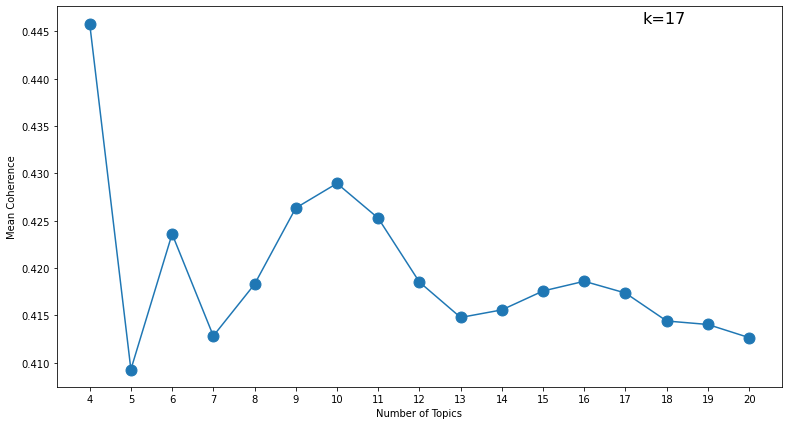

In [159]:
fig = plt.figure(figsize=(13,7))
# create the line plot
ax = plt.plot( k_values, coherences )
plt.xticks(k_values)
plt.xlabel("Number of Topics")
plt.ylabel("Mean Coherence")
# add the points
plt.scatter(k_values, coherences, s=120)
# find and annotate the maximum point on the plot
ymin = min(coherences)
ymax = max(coherences)
xpos = coherences.index(ymin)
#best_k = k_values[xpos]
best_k = k_values[13] #manually set the best k value
plt.annotate("k=%d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points", fontsize=16)
# show the plot
plt.show()

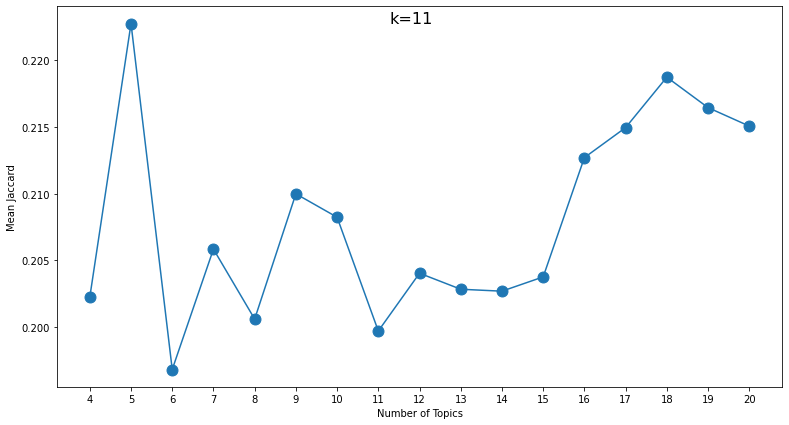

In [160]:
fig = plt.figure(figsize=(13,7))
# create the line plot
ax = plt.plot( k_values, jaccards )
plt.xticks(k_values)
plt.xlabel("Number of Topics")
plt.ylabel("Mean Jaccard")
# add the points
plt.scatter(k_values, jaccards, s=120)
# find and annotate the maximum point on the plot
ymin = min(jaccards)
ymax = max(jaccards)
xpos = jaccards.index(ymin)
#best_k = k_values[xpos]
best_k = k_values[7] #manually set the best k value
plt.annotate("k=%d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points", fontsize=16)
# show the plot
plt.show()

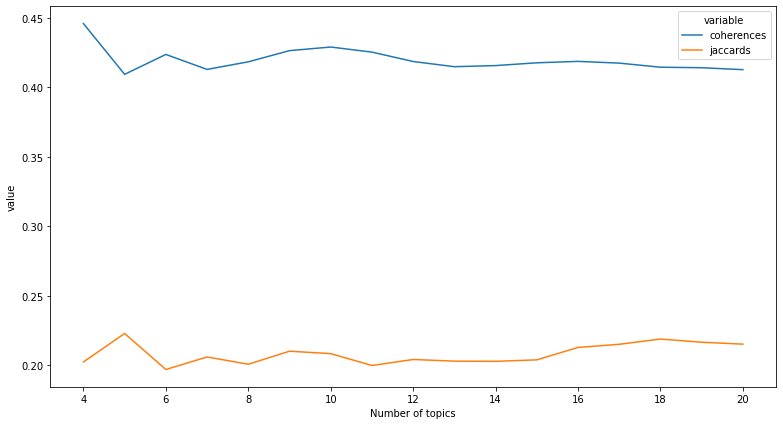

In [161]:
plt.figure(figsize=(13,7))
NMF_sklearn = pd.DataFrame(list(zip(k_values, coherences, jaccards)), 
                  columns = ['num_topics', 'coherences', 'jaccards'])
sns.lineplot(x = 'num_topics',
             y = 'value',
             hue = 'variable',
             data = pd.melt(NMF_sklearn, ['num_topics']))
plt.xlabel('Number of topics')
plt.show()

In [162]:
best_k = k_values[1]
k = best_k
# get the model that we generated earlier.
W = topic_models[k-kmin][1]
H = topic_models[k-kmin][2]

In [163]:
for topic_index in range(k):
    descriptor = get_descriptor(terms, H, topic_index, 10)
    str_descriptor = ", ".join( descriptor )
    print("Topic %02d: %s" % (topic_index+1, str_descriptor) )

Topic 01: attorney, police, child, district, officer, victim, sentence, charge, member, right
Topic 02: tax, return, irs, income, refund, prepare, false, preparer, injunction, file
Topic 03: medicare, health, care, fraud, hhs, patient, oig, claim, home, service
Topic 04: settlement, civil, right, department, discrimination, housing, disability, justice, act, agreement
Topic 05: fraud, criminal, bank, charge, company, antitrust, account, conspiracy, financial, attorney


In [164]:
best_k = k_values[13]
k = best_k
# get the model that we generated earlier.
W = topic_models[k-kmin][1]
H = topic_models[k-kmin][2]

In [165]:
for topic_index in range(k):
    descriptor = get_descriptor(terms, H, topic_index, 10)
    str_descriptor = ", ".join( descriptor )
    print("Topic %02d: %s" % (topic_index+1, str_descriptor) )

Topic 01: criminal, guilty, attorney, district, fraud, plead, admit, company, sentence, bribe
Topic 02: tax, return, prepare, preparer, injunction, customer, complaint, business, income, credit
Topic 03: medicare, health, care, fraud, hhs, oig, home, patient, strike, service
Topic 04: housing, disability, fair, discrimination, right, civil, lawsuit, person, act, department
Topic 05: antitrust, price, fine, industry, charge, agree, division, ongoing, sell, conduct
Topic 06: community, law, violence, enforcement, justice, department, crime, police, program, attorney
Topic 07: account, bank, irs, client, asset, financial, taxpayer, program, foreign, entity
Topic 08: child, sexual, project, safe, abuse, internet, victim, attorney, sex, marshal
Topic 09: terrorist, york, new, support, security, travel, national, al, material, attack
Topic 10: right, officer, civil, assault, police, attorney, victim, division, law, district
Topic 11: indictment, charge, count, defendant, allege, presume, inn